### Step1: Import Dataset and Liabraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import svm
import seaborn as sns

In [2]:
import os
os.chdir('Desktop')

In [3]:
data = pd.read_csv('layoffs_data.csv')

In [4]:
data.head()

,Company,Location,Industry,Laid_Off_Count,Date,Source,Funds_Raised,Stage,Date_Added,Country,Percentage,List_of_Employees_Laid_Off
0,OYO,Gurugram,Travel,600.0,2022-12-03,https://www.livemint.com/companies/news/oyo-to...,4000.0,Series F,2022-12-04 22:53:40,India,NaN,Unknown
1,HealthifyMe,Bengaluru,Fitness,150.0,2022-12-03,https://inc42.com/buzz/fitness-healthtech-star...,100.0,Series C,2022-12-04 23:00:50,India,NaN,Unknown
2,Bybit,Singapore,Crypto,NaN,2022-12-03,https://cointelegraph.com/news/bybit-announces...,NaN,Unknown,2022-12-04 23:04:29,Singapore,0.30,Unknown
3,Cognyte,Tel Aviv,Security,100.0,2022-12-02,https://www.globes.co.il/news/article.aspx?did...,NaN,Unknown,2022-12-04 23:02:11,Israel,0.05,Unknown
4,ShareChat,Bengaluru,Consumer,100.0,2022-12-02,https://www.india.com/business/sharechat-layof...,1700.0,Unknown,2022-12-03 05:18:35,India,NaN,Unknown


### Step 2: Data Cleaning

In [5]:
data.isnull().sum()


Company                         0
Location                        0
Industry                        0
Laid_Off_Count                515
Date                            1
Source                          0
Funds_Raised                  127
Stage                           0
Date_Added                      0
Country                         0
Percentage                    572
List_of_Employees_Laid_Off      0
dtype: int64

<AxesSubplot:>

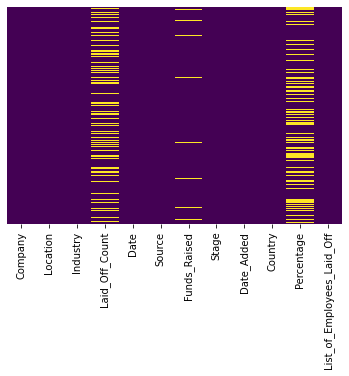

In [6]:
sns.heatmap(data.isnull(), yticklabels=False,cbar=False,cmap='viridis')

### As we can see there are null values in the dataset it required null value treatment

In [7]:
round(data['Funds_Raised'].mean(),0)

871.0

In [8]:
data['Funds_Raised'] = data['Funds_Raised'].fillna(data['Funds_Raised'].mean())

In [9]:
round(data['Percentage'].mean(),0)

0.0

In [10]:
data['Percentage'] = data['Percentage'].fillna(data['Percentage'].mean())

In [11]:
round(data['Laid_Off_Count'].mean(),0)

198.0

In [12]:
data['Laid_Off_Count'] = data['Laid_Off_Count'].fillna(data['Laid_Off_Count'].mean())

<AxesSubplot:>

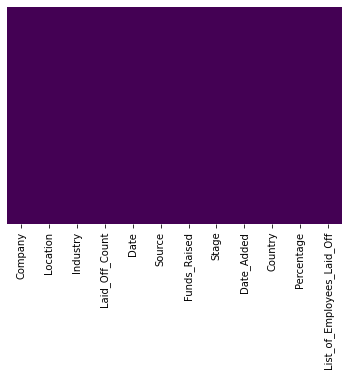

In [13]:
sns.heatmap(data.isnull(), yticklabels=False,cbar=False,cmap='viridis')

We have assigned mean in blank rows under column Funds_Raised,Percentage and Laid_Off_Count

In [14]:
data.drop(data.columns[[5,8,-1]], axis=1, inplace=True)
### We drop date added, source and List_of_Employees_Laid_Off columns from the dataset

In [15]:
data.head()

,Company,Location,Industry,Laid_Off_Count,Date,Funds_Raised,Stage,Country,Percentage
0,OYO,Gurugram,Travel,600.000000,2022-12-03,4000.000000,Series F,India,0.277168
1,HealthifyMe,Bengaluru,Fitness,150.000000,2022-12-03,100.000000,Series C,India,0.277168
2,Bybit,Singapore,Crypto,197.693257,2022-12-03,870.687217,Unknown,Singapore,0.300000
3,Cognyte,Tel Aviv,Security,100.000000,2022-12-02,870.687217,Unknown,Israel,0.050000
4,ShareChat,Bengaluru,Consumer,100.000000,2022-12-02,1700.000000,Unknown,India,0.277168


### Step 3: Explorartory Data Analysis

<AxesSubplot:xlabel='Country', ylabel='count'>

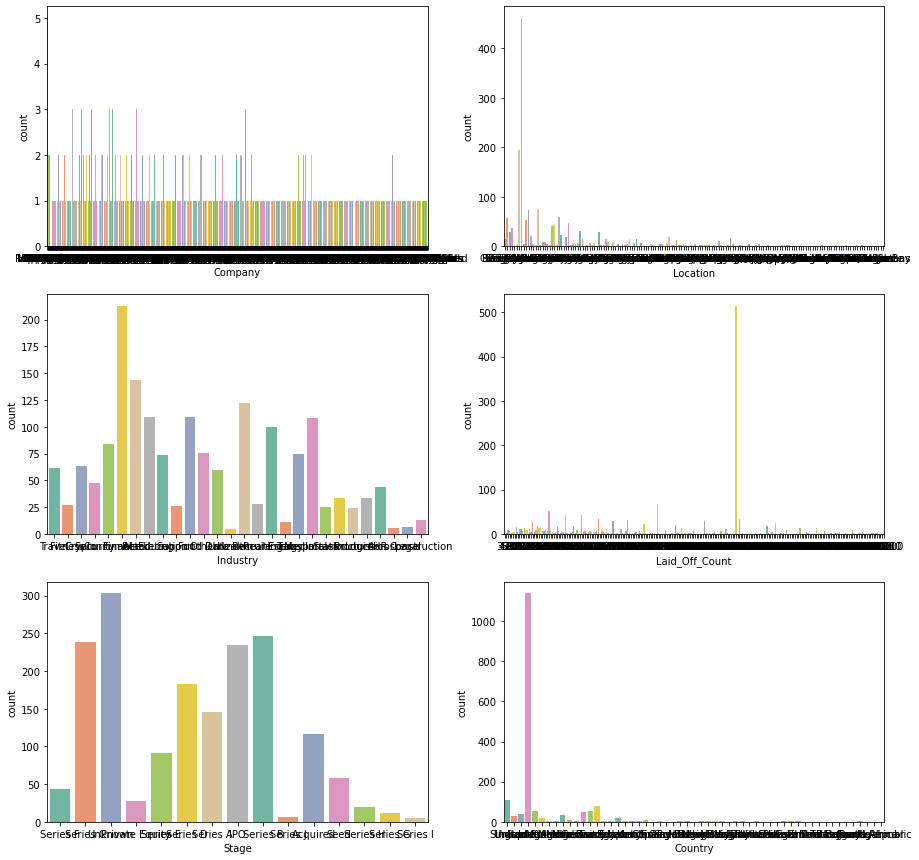

In [16]:
plt.figure(figsize = (15,15))

plt.subplot(3,2,1)
sns.countplot(x = 'Company', palette = 'Set2', data = data)

plt.subplot(3,2,2)
sns.countplot(x = 'Location', palette = 'Set2', data = data)

plt.subplot(3,2,3)
sns.countplot(x = 'Industry', palette = 'Set2', data = data)

plt.subplot(3,2,4)
sns.countplot(x = 'Laid_Off_Count', palette = 'Set2', data = data)

plt.subplot(3,2,5)
sns.countplot(x = 'Stage', palette = 'Set2', data = data)

plt.subplot(3,2,6)
sns.countplot(x = 'Country', palette = 'Set2', data = data)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Laid_Off_Count'>

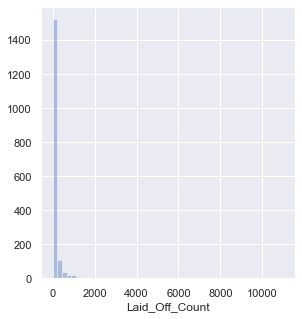

In [17]:
plt.figure(figsize = (10,5))
sns.set(color_codes = True)

plt.subplot(1,2,2)
sns.distplot(data['Laid_Off_Count'], kde = False)

<AxesSubplot:xlabel='Laid_Off_Count'>

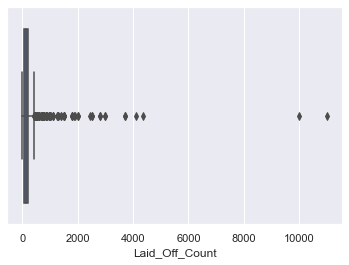

In [18]:
sns.boxplot(x=data["Laid_Off_Count"])

In [19]:
def check(data):
    l=[]
    columns=data.columns
    for col in columns:
        dtypes=data[col].dtypes
        nunique=data[col].nunique()
        sum_null=data[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    data_check=pd.DataFrame(l)
    data_check.columns=['column','dtypes','nunique','sum_null']
    return data_check 
check(data)

,column,dtypes,nunique,sum_null
0,Company,object,1449,0
1,Location,object,162,0
2,Industry,object,28,0
3,Laid_Off_Count,float64,232,0
4,Date,object,404,1
5,Funds_Raised,float64,556,0
6,Stage,object,15,0
7,Country,object,55,0
8,Percentage,float64,70,0


In [20]:
nullyears = pd.isnull(data["Date"])
data = data.drop(data[nullyears].index)

In [21]:
data['Date'] = pd.to_datetime(data['Date'])
data['year'] = data['Date'].dt.year
data['year'].unique().astype(int)

array([2022, 2021, 2020])

 Top 10 companies to lay off employees in 2022


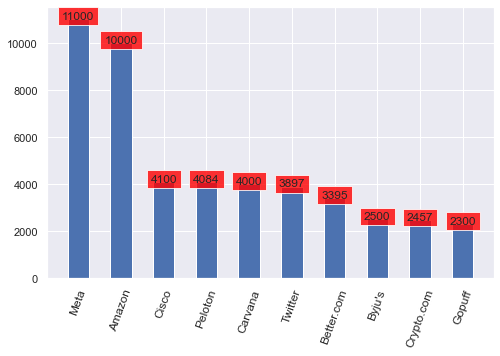

 Top 10 companies to lay off employees in 2021


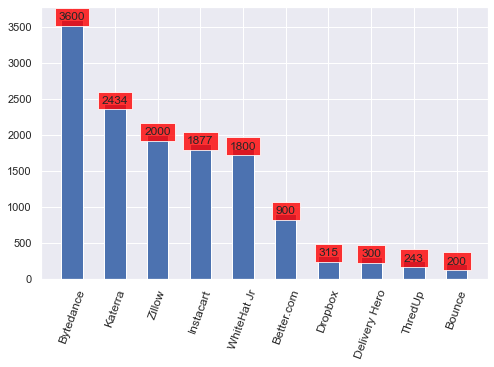

 Top 10 companies to lay off employees in 2020


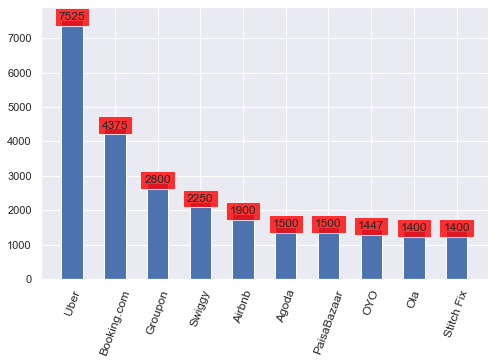

 Top 10 companies to lay off employees in the three years


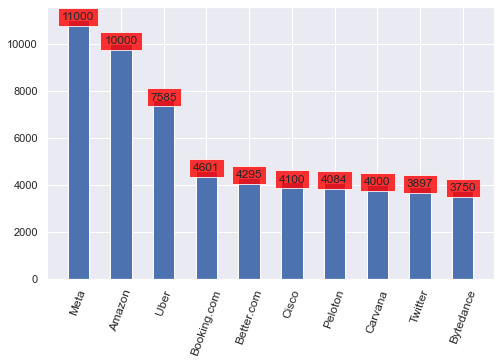

In [22]:
years = data['year'].unique()
for year in years:
    top_10 = data[data['year'] == year]
    top_10 = top_10.groupby('Company')['Laid_Off_Count'].sum().nlargest(10)
    x = top_10.index
    y = top_10.values.astype(int)
    print('\033[1m','Top 10 companies to lay off employees in',year)
    plt.subplots(figsize=(8,5))
    plt.bar(x, y, width=.5)
    plt.xticks(rotation = 70,fontsize=12)
    for i in range(len(x)):
        plt.text(i,y[i],y[i],ha = 'center',bbox = dict(facecolor = 'red', alpha =.8))
    plt.show();

top_10 = data.groupby('Company')['Laid_Off_Count'].sum().nlargest(10)
x = top_10.index
y = top_10.values.astype(int)
print('\033[1m','Top 10 companies to lay off employees in the three years')
plt.subplots(figsize=(8,5))
plt.bar(x, y, width=.5)
plt.xticks(rotation = 70,fontsize=12)
for i in range(len(x)):
    plt.text(i,y[i],y[i],ha = 'center',bbox = dict(facecolor = 'red', alpha =.8))
plt.show();

In above chart we can see top 10 companies who laid off in last 3 years

In [23]:
list = data["Country"].unique()
print(list)

['India' 'Singapore' 'Israel' 'United States' 'United Kingdom' 'Indonesia'
 'Argentina' 'Mexico' 'Australia' 'Nigeria' 'Netherlands' 'Germany'
 'Brazil' 'Canada' 'Switzerland' 'Egypt' 'Sweden' 'Ireland' 'Kenya'
 'Luxembourg' 'China' 'Spain' 'Estonia' 'Greece' 'Poland' 'Seychelles'
 'Norway' 'Belgium' 'Denmark' 'Hong Kong' 'New Zealand' 'Malaysia'
 'Hungary' 'Vietnam' 'Austria' 'Thailand' 'Romania' 'Lithuania' 'Chile'
 'Senegal' 'Pakistan' 'United Arab Emirates' 'Colombia' 'Finland' 'Peru'
 'Bahrain' 'Turkey' 'Russia' 'Uruguay' 'Bulgaria' 'France' 'Portugal'
 'South Africa' 'Czech Republic' 'Myanmar']


In [24]:
Specific_Country = data.loc[(data["Country"]== "India") |
                           (data["Country"]== "United States")|
                           (data["Country"]== "United Kingdom")|
                           (data["Country"]== "Russia")]

In [25]:
type(Specific_Country)

pandas.core.frame.DataFrame

In [26]:
Country = Specific_Country["Country"]
layoffs = Specific_Country["Laid_Off_Count"]

<function matplotlib.pyplot.show(close=None, block=None)>

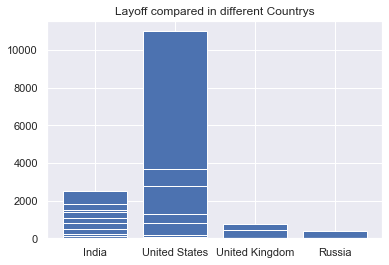

In [27]:
plt.title("Layoff compared in different Countrys")
plt.bar(Country, layoffs)
plt.show

If we check above plot we can see United Kingdom have high layoff count compare to other countries

In [28]:
list = data["Location"].unique()
print(list)

['Gurugram' 'Bengaluru' 'Singapore' 'Tel Aviv' 'Burlington' 'Bend'
 'New York City' 'SF Bay Area' 'Lehi' 'London' 'Los Angeles' 'Jakarta'
 'Buenos Aires' 'Sacramento' 'Boston' 'Mexico City' 'Melbourne' 'Lagos'
 'Amsterdam' 'Guadalajara' 'Berlin' 'Sao Paulo' 'Waterloo' 'Seattle'
 'Sydney' 'Zug' 'Salt Lake City' 'Toronto' 'Cairo' 'Dubai' 'Dallas'
 'Phoenix' 'Chicago' 'Washington D.C.' 'Gothenburg' 'Dublin' 'San Diego'
 'Calgary' 'Nairobi' 'Dover' 'Austin' 'Hamburg' 'Luxembourg' 'Vancouver'
 'Miami' 'Malmö' 'Boulder' 'Lexington' 'Shenzen' 'Barcelona' 'Stamford'
 'Logan' 'Tallin' 'Atlanta' 'Eindhoven' 'Columbus' 'Stockholm' 'Athens'
 'Minneapolis' 'Krakow' 'Hyderabad' 'Nebraska City' 'Copenhagen'
 'Non-U.S.' 'Trondheim' 'Grand Rapids' 'Oslo' 'Pittsburgh' 'Düsseldorf'
 'Montreal' 'Mumbai' 'San Luis Obispo' 'Jerusalem' 'New Delhi'
 'Belo Horizonte' 'Baltimore' 'Philadelphia' 'St. Louis' 'Brussels'
 'Noida' 'The Hague' 'Hong Kong' 'Birmingham' 'Auckland' 'Kuala Lumpur'
 'Munich' 'Bristol' 'La

In [29]:
Specific_City = data.loc[(data["Location"]== "New York City") |
                           (data["Location"]== "London")|
                           (data["Location"]== "Beijing")|
                           (data["Location"]== "Hong Kong")|
                            (data["Location"]== "Bengaluru")]

In [30]:
type(Specific_City)

pandas.core.frame.DataFrame

In [31]:
City = Specific_City["Location"]
layoffs = Specific_City["Laid_Off_Count"]

<function matplotlib.pyplot.show(close=None, block=None)>

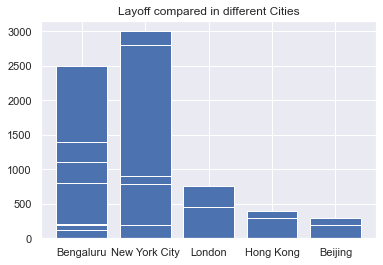

In [32]:
plt.title("Layoff compared in different Cities")
plt.bar(City, layoffs)
plt.show

In above plot we can see that New York City have high layoff count then Benguluru have highest layoff count

<AxesSubplot:xlabel='Country', ylabel='Laid_Off_Count'>

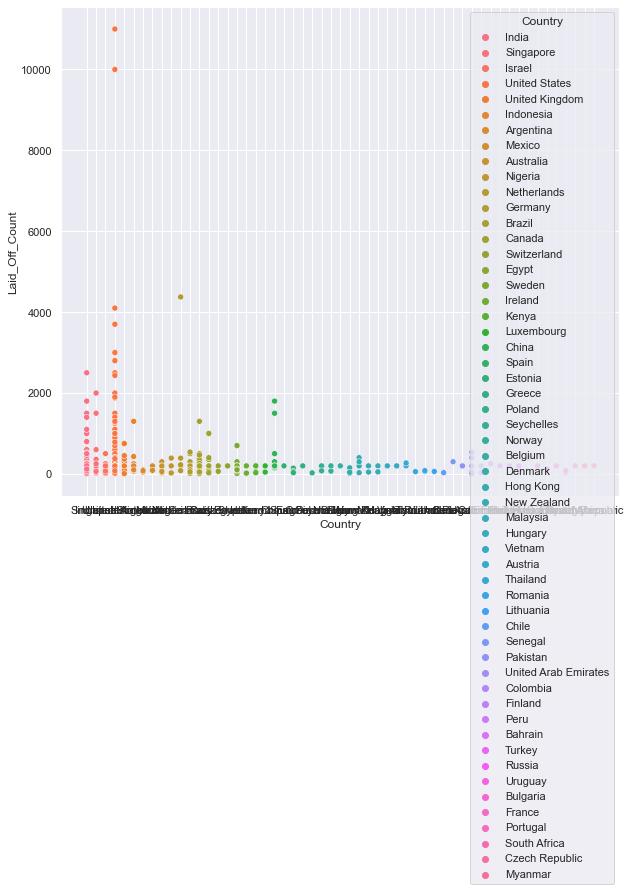

In [35]:
#Scatter plot for Rating vs. Price
plt.figure(figsize=(10, 9))
sns.scatterplot(
    data=data, x="Country", y="Laid_Off_Count", hue="Country",
    sizes=(20, 200),  legend="full")

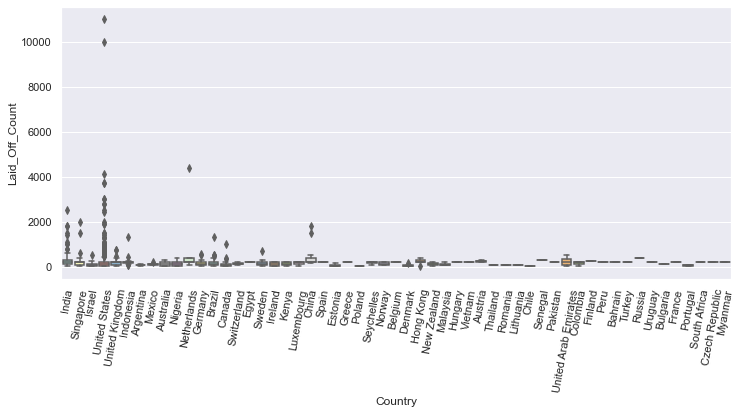

In [36]:
#Box plot for Rating vs. Category
plt.figure(figsize=(12, 5))
rvca = sns.boxplot(data = data,x ='Country', y ='Laid_Off_Count', palette ='Set3')
plt.show(plt.setp(rvca.get_xticklabels(), rotation = 80))

Conclusion - Based on varoius chart as shown above we can conclude that United States have major layoffs and post that India, Singapore, china is there